<a href="https://colab.research.google.com/github/koh-hongQ/python/blob/main/%EB%85%BC%ED%94%84_%EA%B3%BC%EC%A0%9C_CNN1%EB%B2%88_smiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/archive (4) (2)

/content/drive/MyDrive/archive (4) (2)


In [ ]:
ls

non_smile/  smile/


Text(0.5, 1.0, 'Non_smile')

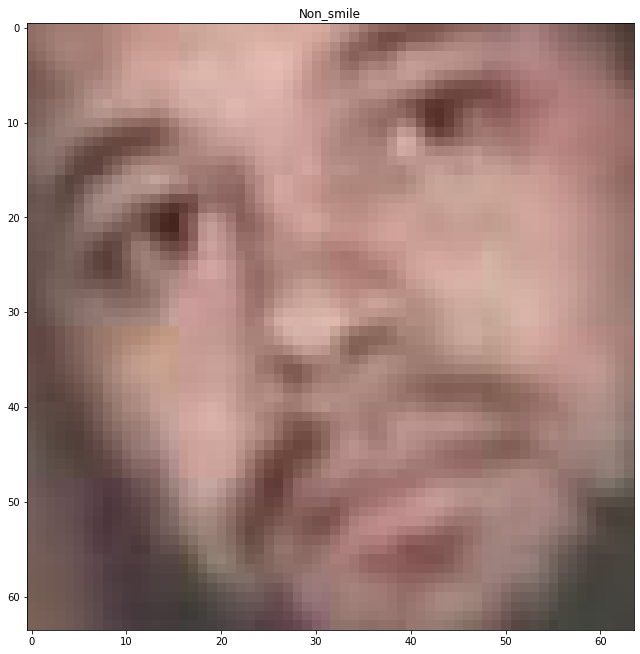

In [ ]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image_sample= imread('non_smile/Aaron_Patterson_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('Non_smile')
#ax.axis('off');

Text(0.5, 1.0, 'Smile')

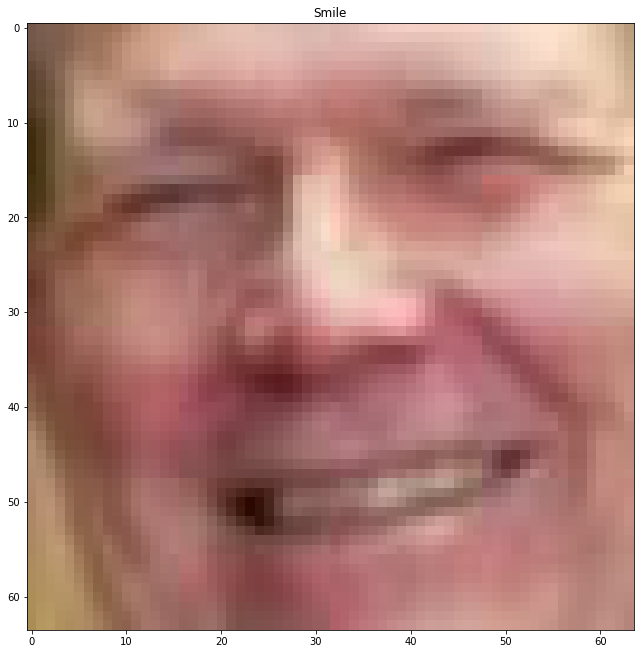

In [ ]:

image_sample2= imread('smile/James_Kelly_0009.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample2, ax=ax)
ax.set_title('Smile')

In [ ]:
### 그림의 모양을 확인해 보았습니다.

image_sample2.shape

(64, 64, 3)

In [ ]:
### 그냥 root directory(맨땅)에서 시작하고자 합니다. 그래서 cd /

In [ ]:
cd /

/


In [ ]:
# ImageDataGenerator의 flow_from_directory를 사용하여 directory로 데이터를 입력

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

### ImageDataGenerator는 픽셀의 컬러 혹은 흑백값을 0에서 255를 0과 1사이로 바꾸어 줍니다. 이것은 필수입니다.
### ImageDataGenerator는 여러가지 옵션으로 사진의 갯수를 늘릴 수 있습니다.


### 아래는 train data에게 적용되는 옵션입니다.

train_gen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환 ## 이것은 사실상 필수 사항입니다.
        rotation_range=40,      # 40도까지 회전
        width_shift_range=0.2,  # 20%까지 좌우 이동
        height_shift_range=0.2, # 20%까지 상하 이동
        shear_range=0.2,        # 20%까지 기울임
        zoom_range=0.2,         # 20%까지 확대
        horizontal_flip=True,   # 좌우 뒤집기
    )


### 이제 /content/drive/MyDrive/archive (4) (2) train data로 쓸 그림을 가지고 옵니다. 
### 그리고 각각 폴더에서 온 것을 [1,0]과 [0,1]를 정답으로 해서 불러옵니다.

train = train_gen.flow_from_directory(directory='../content/drive/MyDrive/archive (4) (2)',
                                              target_size=(160, 185),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize, 사이즈를 원하는 모양으로 조절이 가능해요.
                                              color_mode='rgb',       # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                              class_mode='categorical', # class_mode='binary',
                                              batch_size=20,
                                              shuffle=True)


#### 아래는 validation_data에 사용할 data를 쓰는 것이라서 오직 크기를 변경하는 것만 하고, 다른 선택사항은 사용하지 않습니다.

valid_gen = ImageDataGenerator(
        rescale=1./255        
    ) 



# 컨볼루션 신경망의 설정
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(160, 185, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
### [1,0]과 [0,1]이므로 위와 같이 했습니다.
### 만약 위에서 class_mode='binary'설정했다면, Dense(1,activation='sigmoid' )가 되여야 하고, 아래 compile을 loss=' binary_crossentropy'해야 합니다.

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.fit_generator(train, epochs=5 )


Found 1203 images belonging to 2 classes.


<ipython-input-11-e18c6aa3ad66>:64: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train, epochs=5 )


Epoch 1/5
61/61 [==============================] - 330s 5s/step - loss: 3.4598 - accuracy: 0.5096
Epoch 2/5
61/61 [==============================] - 154s 3s/step - loss: 0.6931 - accuracy: 0.5179
Epoch 3/5
61/61 [==============================] - 159s 3s/step - loss: 0.6899 - accuracy: 0.5461
Epoch 4/5
61/61 [==============================] - 157s 3s/step - loss: 0.6905 - accuracy: 0.5586
Epoch 5/5
61/61 [==============================] - 159s 3s/step - loss: 0.6875 - accuracy: 0.5786
